## Imports:

In [15]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

## Data:

In [2]:
california = fetch_california_housing()
cal = pd.DataFrame(california.data, columns=california.feature_names)
cal['MedHouseVal'] = california.target  # Target variable
print(cal.info())
print(cal.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.

## 1. Explore the Data:

**Examine Distributions and Correlations:**

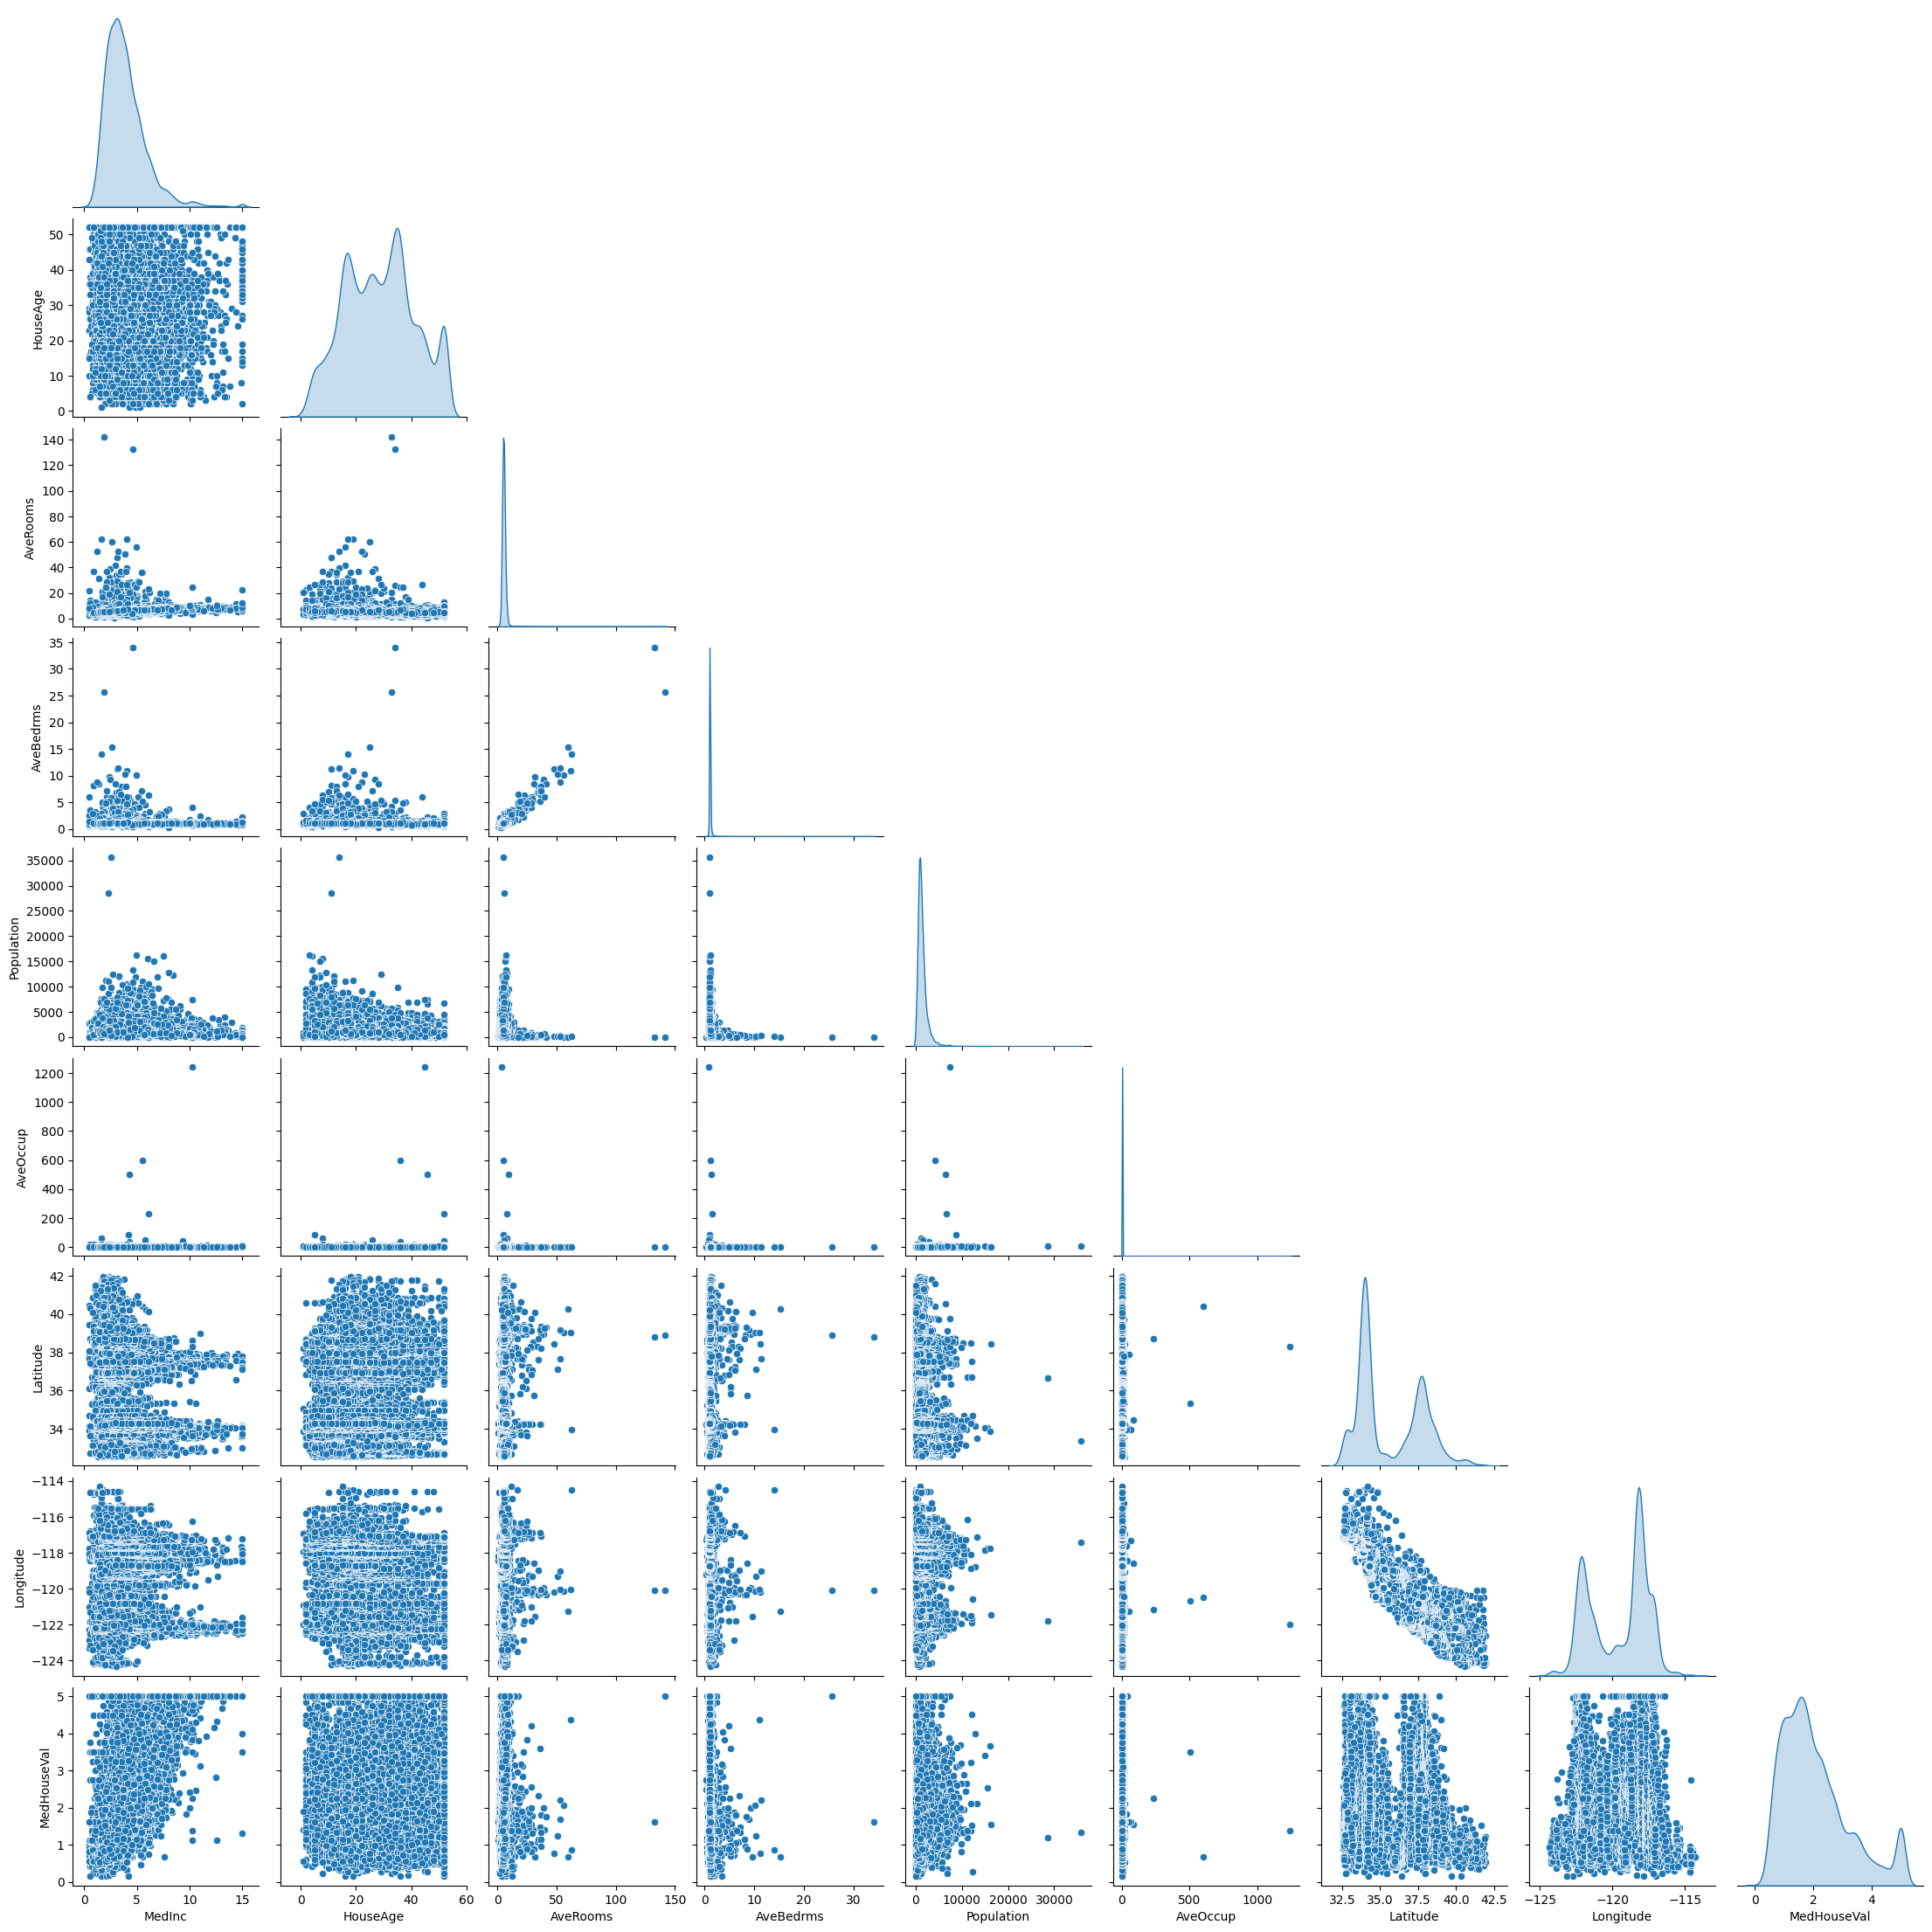

In [3]:
# Pairplot for a quick visualization
sns.pairplot(cal, diag_kind='kde', corner=True)
plt.show()

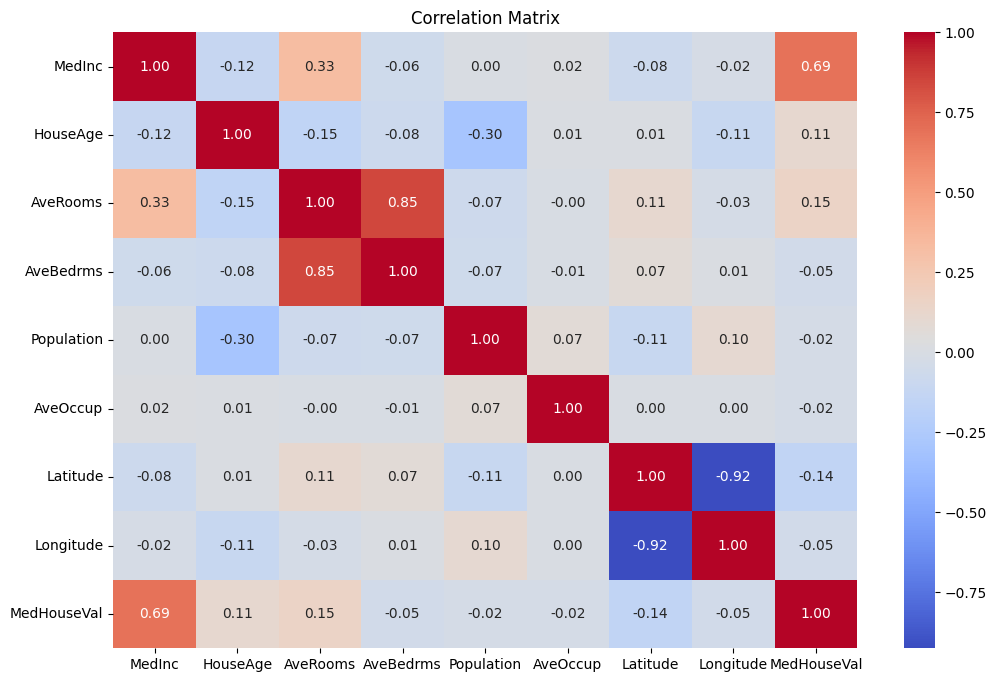

In [4]:
# Correlation matrix
corr_matrix = cal.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Understand the Columns**

In [5]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

## 2. Clean the Data:

**Handle Missing Values**

In [6]:
print(cal.isnull().sum())
cal.fillna(cal.mean(), inplace=True)

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


**Remove Anomalies (z-score statistical decision)**

In [7]:
from scipy.stats import zscore
z_scores = cal.apply(zscore)
cal = cal[((z_scores > -3) & (z_scores < 3)).all(axis=1)]
print(f"Remain rows:{len(cal)}")

Remain rows:19794


## 3. Build the Model:

**Train a Model on All Data**

In [8]:
# Split data
X = cal.drop('MedHouseVal', axis=1)
y = cal['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.473101625442082
RMSE: 0.6878238331448555
R^2 Score: 0.6162271478185639


**Examine the Model**

In [9]:
# Display coefficients and intercept
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))

      Feature  Coefficient
3   AveBedrms     1.418798
0      MedInc     0.517727
1    HouseAge     0.012226
4  Population     0.000033
2    AveRooms    -0.183535
5    AveOccup    -0.241306
6    Latitude    -0.393486
7   Longitude    -0.395548


**Examine Errors**

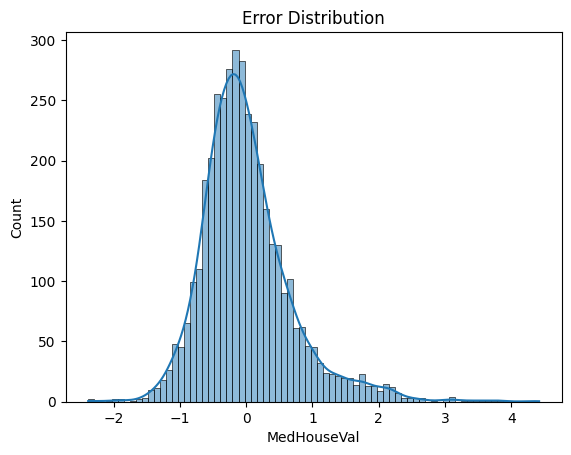

In [10]:
errors = y_test - y_pred
sns.histplot(errors, kde=True)
plt.title("Error Distribution")
plt.show()

**Training with and without Features**

In [11]:
# Remove less significant features
X_train_sig = X_train.drop(columns=["Population","HouseAge"])
X_test_sig = X_test.drop(columns=["Population","HouseAge"])

# Retrain
model_sig = LinearRegression()
model_sig.fit(X_train_sig, y_train)
y_pred_sig = model_sig.predict(X_test_sig)

# Evaluate
print("Mean Squared Error (significant features):", mean_squared_error(y_test, y_pred_sig))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print("R^2 Score (significant features):", r2_score(y_test, y_pred_sig))

Mean Squared Error (significant features): 0.49470440254597
RMSE: 0.6878238331448555
R^2 Score (significant features): 0.5987033031764071


In [21]:
# Retrain
model_sig_2 = DecisionTreeRegressor()
model_sig_2.fit(X_train_sig, y_train)
y_pred_sig_2 = model_sig_2.predict(X_test_sig)

# Evaluate
print("Mean Squared Error (significant features):", mean_squared_error(y_test, y_pred_sig_2))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print("R^2 Score (significant features):", r2_score(y_test, y_pred_sig_2))

Mean Squared Error (significant features): 0.49919299293129576
RMSE: 0.6878238331448555
R^2 Score (significant features): 0.5950622268371724


**Explaination:** To termove not significant features not improve model but it gets worse than before and another model doesn't improve the results.